CS4650 Capstone Project

Team: Wesley Kwan and Vincent Lee
The dataset we are looking at contains data on reviews for different airbnb listings in NY from 2009 to 2021. We got this dataset from here: https://www.kaggle.com/code/aamisha/generating-the-ratings-for-tweets

The dataset that we are looking at contains a date and a piece of text for the review. We will need to clean up the data and then try to give each review a rating based on how positive/negative the review is. Then we will try to analyze the data based on that rating.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("NYC_2021_airbnb_reviews_data1.csv")
df.head()

,listing_id,url,review_posted_date,review
0,2595,https://www.airbnb.com/rooms/2595,November 2019,"Great location, convenient to everything. Very..."
1,2595,https://www.airbnb.com/rooms/2595,May 2019,Place was so cute and comfy! Host was great an...
2,2595,https://www.airbnb.com/rooms/2595,May 2019,10 / 10 would stay again
3,2595,https://www.airbnb.com/rooms/2595,January 2019,The apartment met expectations to how it was i...
4,2595,https://www.airbnb.com/rooms/2595,December 2018,Great space in a fun old building in NYC. Love...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17444 entries, 0 to 17443
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   listing_id          17444 non-null  int64 
 1   url                 17444 non-null  object
 2   review_posted_date  17444 non-null  object
 3   review              17444 non-null  object
dtypes: int64(1), object(3)
memory usage: 545.2+ KB


In [4]:
id = df.listing_id.unique()
len(id)

219

In total there are more than 17000 reviews for 219 listings. But first, we will need to clean the data a bit before working on it further.

In [5]:
review = df[["listing_id", "review_posted_date", "review"]]
review.head()

,listing_id,review_posted_date,review
0,2595,November 2019,"Great location, convenient to everything. Very..."
1,2595,May 2019,Place was so cute and comfy! Host was great an...
2,2595,May 2019,10 / 10 would stay again
3,2595,January 2019,The apartment met expectations to how it was i...
4,2595,December 2018,Great space in a fun old building in NYC. Love...


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
import re

def process(text):
    text = re.sub('[^a-zA-Z]+', ' ', text).strip()
    tokens = wordpunct_tokenize(text.lower())
    final_stopwords = stopwords.words('english') + stopwords.words('french') + stopwords.words('spanish') + stopwords.words('german')
    tokens_wo_stopwords = [t for t in tokens if t not in final_stopwords]
    text = " ".join(tokens_wo_stopwords)
    return(text)
process(review['review'][0])

'great location convenient everything cool space building'

In [8]:
review['clean_text'] = review['review'].apply(lambda text: process(text))
review.head()

,listing_id,review_posted_date,review,clean_text
0,2595,November 2019,"Great location, convenient to everything. Very...",great location convenient everything cool spac...
1,2595,May 2019,Place was so cute and comfy! Host was great an...,place cute comfy host great quick communicate ...
2,2595,May 2019,10 / 10 would stay again,would stay
3,2595,January 2019,The apartment met expectations to how it was i...,apartment met expectations insinuated ad jenni...
4,2595,December 2018,Great space in a fun old building in NYC. Love...,great space fun old building nyc loved lightin...


The code above is used to clean the data and remove stopwords using the nltk library. We clean the data by only allowing letters and spaces. We remove stopwords to remove noise and to try and get only the important words. We also have many reviews in different languages too so we will be removing stopwords from those languages as well. 

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
text = review['clean_text'][46]
print(text)
analyzer.polarity_scores(text)
analyzer.polarity_scores(" ")

hebben genoten van ons verblijf het appartement van jennifer prima centraal gelegen ook v openbaar vervoer het daklicht maakt dat het prettig licht ruim aanvoelt enige minpuntje vier trappen


{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}

In [10]:
review['review_score_cleaned'] = review['clean_text'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
review.head()

,listing_id,review_posted_date,review,clean_text,review_score_cleaned
0,2595,November 2019,"Great location, convenient to everything. Very...",great location convenient everything cool spac...,0.7506
1,2595,May 2019,Place was so cute and comfy! Host was great an...,place cute comfy host great quick communicate ...,0.9432
2,2595,May 2019,10 / 10 would stay again,would stay,0.0000
3,2595,January 2019,The apartment met expectations to how it was i...,apartment met expectations insinuated ad jenni...,0.7506
4,2595,December 2018,Great space in a fun old building in NYC. Love...,great space fun old building nyc loved lightin...,0.9062


In [11]:
review.drop('review', axis=1, inplace=True)

In [1]:
review.to_csv("reviews_with_sentiment.csv", header=False, index=False)

NameError: name 'review' is not defined

After cleaning, we used nltk's sentiment intensity analyzer to give us a rating on the data based on how positive/negative a comment is. The closer the score is to 1, the more positive the score whilst the closer to -1 the score is, the more negative thre review. 0's would mean that the review is neutral, however it usually means that the analyser can't make a decision because it can't understand the review or the cleaned text review has too little in it to make judgement. 

In [2]:
from matplotlib import pyplot as plt
review["review_score_cleaned"].hist()

NameError: name 'review' is not defined

!python sentiment_month_and_year.py -r local reviews_with_sentiment.csv --no-bootstrap-mrjob

As you can see from this histogram, the reviews in this dataset are heavily skewed towards being 1, which means that the analyzer found that most reviews in this dataset were positive in nature.

Now, we will try to use map/reduce functions to get analytical information on the data. 

In [14]:
%%file sentiment_listing.py
from mrjob.job import MRJob

class SentimentListing(MRJob):

    def mapper(self, _,line):
        val=line.split(',')
        listing_id = int(val[0])
        rsc = float(val[3])
        if rsc <= 1 and rsc >= -1:
            yield listing_id, rsc

    def reducer(self, key, values):
        count =0
        total =0
        max =-1
        min = 1

        for t in values:
            count = count + 1
            total += t
            if(t>max):
                max = t
            if(t<min):
                min = t
        yield key , {"count": count, "average":(total /count), "max":max, "min":min}


if __name__ == '__main__':
    SentimentListing.run()

Overwriting sentiment_listing.py


In [15]:
!python sentiment_listing.py -r local reviews_with_sentiment.csv --no-bootstrap-mrjob > listing.txt

No configs found; falling back on auto-configuration
No configs specified for local runner
Creating temp directory C:\Users\vinny\AppData\Local\Temp\sentiment_listing.vinny.20221217.191129.268304
Running step 1 of 1...
job output is in C:\Users\vinny\AppData\Local\Temp\sentiment_listing.vinny.20221217.191129.268304\output
Streaming final output from C:\Users\vinny\AppData\Local\Temp\sentiment_listing.vinny.20221217.191129.268304\output...
Removing temp directory C:\Users\vinny\AppData\Local\Temp\sentiment_listing.vinny.20221217.191129.268304...


This map/reduce function is used to get the count of reviews, average review score, max score, and min score for each listing. 

In [16]:
import json

listing = pd.read_csv("listing.txt", sep="\t", header=None)
listing.columns = ["listing_id", "stats"]
listing["stats"] = [json.loads(e) for e in listing["stats"]]
listing["count"] = [int(e["count"]) for e in listing["stats"]]
listing["average"] = [float(e["average"]) for e in listing["stats"]]
listing["max"] = [float(e["max"]) for e in listing["stats"]]
listing["min"] = [float(e["min"]) for e in listing["stats"]]
listing.drop("stats", axis=1, inplace=True)
listing.head()

,listing_id,count,average,max,min
0,100186,110,0.873595,0.9985,-0.3612
1,100368,35,0.944111,0.9915,0.7906
2,101053,38,0.862074,0.9922,0.0000
3,1023529,191,0.792730,0.9938,-0.3415
4,1025001,152,0.878804,0.9984,-0.4833


In [17]:
listing = listing[listing['count'] >= 5]
listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 218
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   listing_id  202 non-null    int64  
 1   count       202 non-null    int64  
 2   average     202 non-null    float64
 3   max         202 non-null    float64
 4   min         202 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 9.5 KB


In [18]:
(max_average, max_index) = (-1, 0)
(min_average, min_index) = (1, 0)
for index, row in listing.iterrows():
    if row["average"] > max_average:
        max_average = row["average"]
        max_index = index
    if row["average"] < min_average:
        min_average = row["average"]
        min_index = index
print(f'listing with max average:\n{listing.loc[max_index]}')
print()
print(f'listing with min average:\n{listing.loc[min_index]}')

listing with max average:
listing_id    15396.0000
count             5.0000
average           0.9710
max               0.9858
min               0.9601
Name: 83, dtype: float64

listing with min average:
listing_id    1.869685e+06
count         9.000000e+00
average       4.942556e-01
max           9.924000e-01
min          -6.249000e-01
Name: 98, dtype: float64


In [19]:
group = review.groupby('listing_id')['review_score_cleaned'].apply(list)
group = group.reset_index(name='listvalues')
group

,listing_id,listvalues
0,2595,"[0.7506, 0.9432, 0.0, 0.7506, 0.9062, 0.9389, ..."
1,5121,"[0.9651, 0.9118, 0.9001, 0.9761, 0.9822, 0.983..."
2,5178,"[0.8271, 0.6249, 0.6249, 0.9382, 0.0717, 0.790..."
3,5203,"[0.8885, 0.9349, 0.8479, 0.9186, 0.9632, 0.938..."
4,5803,"[0.9493, 0.7003, 0.9652, 0.9819, 0.9509, 0.952..."
...,...,...
214,1910270,"[0.8807, 0.6249, 0.8074, 0.9877, 0.9479, 0.976..."
215,1913540,"[0.9868, 0.9017]"
216,1914185,"[0.9413, 0.0, 0.3612, 0.9345, 0.9403, 0.7845, ..."
217,1914231,"[0.9919, 0.9501, 0.4215, -0.0516, 0.9081, 0.87..."


The boxplot below shows all review scores grouped by their listing, so each boxplot is one listing. We are able to see how skewed the data is as most of the boxes exist from the 1 to 0.75 range. However, we can see that a couple of listings do have their fair share of negative reviews.

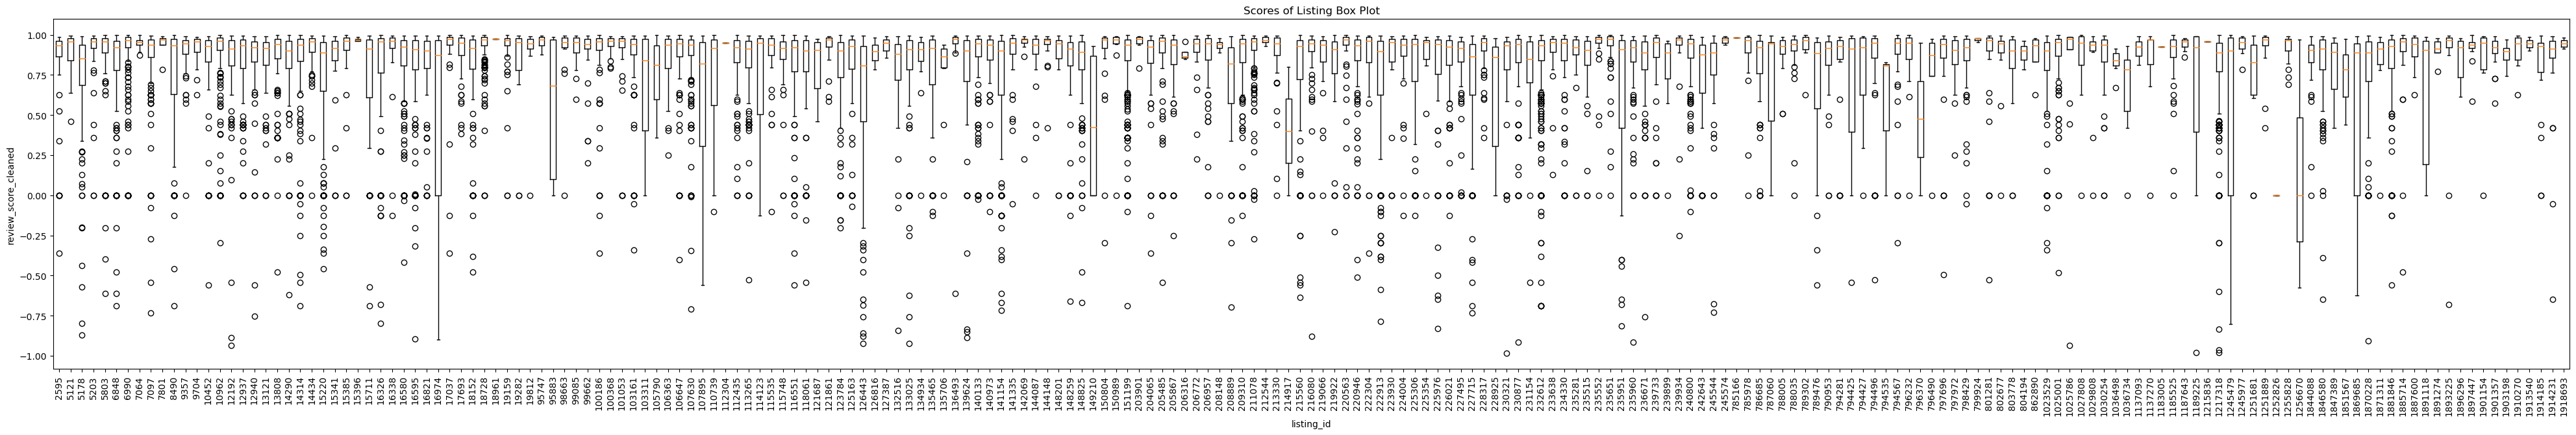

In [20]:
fig = plt.figure(figsize=(50, 7))
ax = fig.add_subplot(111)
ax.boxplot(group['listvalues'], vert=1)
ax.set_xticklabels(group['listing_id'])
ax.set_xlabel('listing_id')
ax.set_ylabel('review_score_cleaned')
plt.xticks(rotation=90)
plt.title("Scores of Listing Box Plot")
plt.savefig(f'boxplots/bp_long', bbox_inches='tight')

In [32]:
import datetime as dt
review['review_posted_date'] = pd.to_datetime(review['review_posted_date']).dt.to_period('m')
review['review_posted_date'] =review['review_posted_date'].dt.strftime('%Y-%m')
review['review_posted_date']

0        2019-11
1        2019-05
2        2019-05
3        2019-01
4        2018-12
          ...   
17439    2022-02
17440    2022-01
17441    2021-12
17442    2021-11
17443    2021-11
Name: review_posted_date, Length: 17444, dtype: object

In [34]:
group2 = review.groupby('review_posted_date')['review_score_cleaned'].apply(list)
group2 = group2.reset_index()
group2.sort_values(by='review_posted_date')
group2

,review_posted_date,review_score_cleaned
0,2009-04,[0.9764]
1,2009-05,"[0.9344, 0.8481, 0.9788, 0.9186, 0.9524]"
2,2009-06,"[0.7964, 0.8519, 0.974, 0.9538]"
3,2009-07,"[0.4588, 0.8934, 0.9926, 0.9855, 0.7506, 0.998..."
4,2009-08,"[0.9816, 0.9769, 0.9359, 0.97, 0.9962]"
...,...,...
151,2021-11,"[0.8316, 0.9466, 0.9652, 0.8519, 0.9652, 0.981..."
152,2021-12,"[0.9382, 0.0717, 0.7906, 0.8779, 0.7964, 0.700..."
153,2022-01,"[0.6249, 0.8885, 0.8442, 0.9493, 0.8934, 0.880..."
154,2022-02,"[0.8271, 0.6249, 0.8442, 0.9849, 0.9477, 0.986..."


FileNotFoundError: [Errno 2] No such file or directory: 'boxplotsMY/bp_long.png'

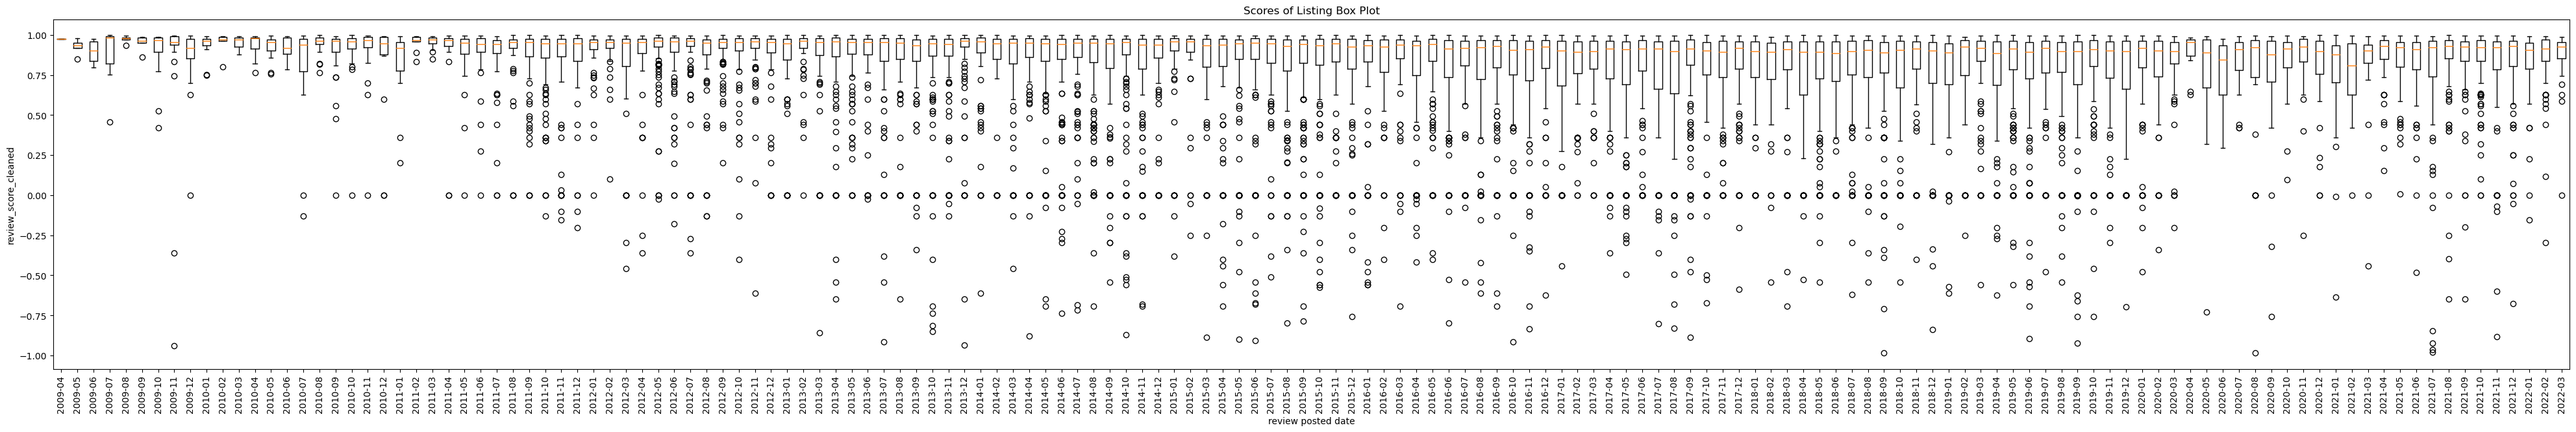

In [36]:
fig = plt.figure(figsize=(50, 7))
ax = fig.add_subplot(111)
ax.boxplot(group2['review_score_cleaned'], vert=1)
ax.set_xticklabels(group2['review_posted_date'])
ax.set_xlabel('review posted date')
ax.set_ylabel('review_score_cleaned')
plt.xticks(rotation=90)
plt.title("Scores of Listing Box Plot")
plt.savefig(f'boxplotsMY/bp_long', bbox_inches='tight')

In [ ]:
We wanted to see how the reviews may have changed over time so we grouped by the 

In [31]:
group3 = review.groupby(review['review_posted_date'].astype(str).str[:2])['review_score_cleaned'].apply(list)
group3 = group3.reset_index()
group3

,review_posted_date,review_score_cleaned
0,01,"[0.7506, 0.941, 0.959, 0.7184, 0.8316, 0.9836,..."
1,02,"[0.9678, 0.9746, 0.8271, 0.6249, 0.6249, 0.624..."
2,03,"[0.9862, 0.9371, 0.9805, 0.9851, 0.8555, 0.271..."
3,04,"[0.9884, 0.9781, 0.9214, 0.9136, 0.8176, 0.925..."
4,05,"[0.9432, 0.0, 0.9341, 0.5256, 0.9325, 0.9179, ..."
5,06,"[0.9081, 0.34, 0.9651, 0.8625, 0.9888, 0.6369,..."
6,07,"[0.9705, 0.9823, 0.9768, 0.9657, 0.7184, 0.731..."
7,08,"[0.9569, 0.9575, 0.9837, 0.9476, 0.9324, 0.983..."
8,09,"[0.9382, 0.936, 0.8934, 0.9778, 0.0, 0.8316, 0..."
9,10,"[0.9341, 0.0, 0.9875, 0.9726, 0.7906, 0.9001, ..."


In [ ]:
%%file sentiment_month_and_year.py
from mrjob.job import MRJob
import re

DATE_RE = re.compile(r"[a-zA-Z]* [0-9]{4}")

class SentimentMonthYear(MRJob):

    def mapper(self, _, line):
        val = line.split(',')
        (review_posted_date, review_score_cleaned) = (val[1].strip(), float(val[3]))
        if (re.match(DATE_RE, review_posted_date) and (-1 <= review_score_cleaned <= 1)):
            yield review_posted_date, review_score_cleaned

    def reducer(self, key, values):
        total = 0.0
        count = 0
        max = -1
        min = 1
        for value in values:
            total += value
            count += 1
            if(value > max):
                max = value
            if(value < min):
                min = value
        yield key, {"average":(total / count), "max":max, "min":min}

if __name__ == '__main__':
    SentimentMonthYear.run()

In [ ]:
!python sentiment_month_and_year.py -r local reviews_with_sentiment.csv --no-bootstrap-mrjob > month_year.txt

In [ ]:
%%file sentiment_month.py
from mrjob.job import MRJob
import re

DATE_RE = re.compile(r"[a-zA-Z]* [0-9]{4}")

class SentimentMonth(MRJob):

    def mapper(self, _, line):
        val = line.split(',')
        (review_posted_date, review_score_cleaned) = (val[1].strip(), float(val[3]))
        if (re.match(DATE_RE, review_posted_date) and (-1 <= review_score_cleaned <= 1)):
            month = review_posted_date.split()[0]
            yield month, review_score_cleaned

    def reducer(self, key, values):
        total = 0.0
        count = 0
        max = -1
        min = 1
        for value in values:
            total += value
            count += 1
            if(value > max):
                max = value
            if(value < min):
                min = value
        yield key, {"average":(total / count), "max":max, "min":min}

if __name__ == '__main__':
    SentimentMonth.run()

In [ ]:
!python sentiment_month.py -r local reviews_with_sentiment.csv --no-bootstrap-mrjob > month.txt

In [ ]:
%%file sentiment_words.py
from mrjob.job import MRJob

class SentimentWords(MRJob):

    def mapper(self, _, line):
        val = line.split(',')
        (clean_text, review_score_cleaned) = (val[2].strip(), float(val[3]))
        if ((len(clean_text) > 0) and (-1 <= review_score_cleaned <= 1)):
            frequency = {}
            words = clean_text.split()
            for word in words:
                if len(word) > 1:
                    if word in frequency.keys():
                        frequency[word] += 1
                    else:
                        frequency[word] = 1
            sentiment = "positive"
            if review_score_cleaned <= -0.05:
                sentiment = "negative"
            elif review_score_cleaned < 0.05:
                sentiment = "neutral"
            frequency = dict(sorted(frequency.items(),
                                key=lambda item: item[1], reverse=True))
            yield sentiment, frequency

    def reducer(self, key, values):
        total_frequency = {}
        for frequency in values:
            for word in frequency:
                if word in total_frequency.keys():
                    total_frequency[word] += frequency[word]
                else:
                    total_frequency[word] = frequency[word]
        total_frequency = dict(filter(lambda item: item[1] > 1, total_frequency.items()))
        total_frequency = dict(sorted(total_frequency.items(),
                                key=lambda item: item[1], reverse=True))
        yield key, total_frequency

if __name__ == '__main__':
    SentimentWords.run()

In [ ]:
!python sentiment_words.py -r local reviews_with_sentiment.csv --no-bootstrap-mrjob > words.txt